# MLOps Exercise: Medical Image Classification with Chest X-Ray Images

## Introduction

In this exercise, you'll gain practical experience with MLOps (Machine Learning Operations) by working on a real-world problem: classifying chest X-ray images to diagnose pneumonia. You'll go through various stages, from data cleaning to deployment, learning how to manage an end-to-end machine learning pipeline.

### Prerequisites

- Basic understanding of Python
- Familiarity with machine learning concepts
- Experience with Jupyter Notebooks

### Tools and Libraries

- Python
- NumPy
- OpenCV
- TensorFlow/Keras
- scikit-learn
- Flask
- Matplotlib
- imbalanced-learn

These libraries should cover most requirements for this exercise, including data manipulation (NumPy, pandas), visualization (Matplotlib), machine learning (scikit-learn, TensorFlow), image processing (OpenCV), and class imbalance treatment (imbalanced-learn).

### Table of Contents

1. [Data Loading and Cleaning](#Data-Loading-and-Cleaning)
2. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
3. [Class Imbalance](#Class-Imbalance)
4. [Model Building](#Model-Building)
5. [Data Augmentation](#Data-Augmentation)
6. [Model Evaluation](#Model-Evaluation)
7. [Model Deployment (Bonus)](#Model-Deployment-(Bonus))


## Environment Setup

Before we begin, let's set up the environment. We'll install the necessary Python packages for this exercise.

```bash
pip install numpy pandas opencv-python matplotlib scikit-learn tensorflow flask
```

You can also create a `requirements.txt` file with the above packages and install them using `pip install -r requirements.txt`.
Be aware that you should download ipykernel and export your env to the jupyter notebook.
```bash
python -m ipykernel install --user --name=my_new_env
```

In [2]:
print('test')

test


## Data Loading and Cleaning

### Objective

Load the dataset and clean it by removing corrupted images.

### Guidance

1. Download the Chest X-Ray Images (Pneumonia) dataset and place it in a directory accessible by this notebook. From https://ametice.univ-amu.fr
2. Unzip the dataset and explore its directory structure.
3. Load the images and labels for training.
4. Write a function to scan for and remove any corrupted or invalid images.

### Exercise

Now, load the dataset use the zipfile library and clean it by removing corrupted images. Write your code in the cell below.

```python
import zipfile

zip_file_path = 'path/to/your/zip/file.zip'
extract_path = 'path/to/extract/folder'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
```

After extracting, your dataset should have the following folder structure:

```
/
|-- test/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- train/
|   |-- NORMAL/
|   |-- PNEUMONIA/
|-- val/
    |-- NORMAL/
    |-- PNEUMONIA/
```

You can point `train_path` and `test_path` to the `train` and `test` folders inside this extracted directory

### 1.Unzip the dataset and explore its directory structure


In [ ]:
import zipfile

zip_file_path = 'C:/Users/ASUS/Downloads/Dataset.zip'
extract_path = 'C:/Users/ASUS/Desktop/M2_SID/MFD'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

## Exploratory Data Analysis (EDA)

### Objective

Understand the dataset's basic statistics and visualize the data.

### Guidance

1. Use matplotlib to visualize some sample images from each class.
2. Investigate the distribution of classes (Pneumonia/Normal).

### Exercise

Perform exploratory data analysis on the dataset. Write your code in the cell below.


### 2. Import of all libraries i will need 

In [1]:
from PIL import Image #Python Imaging Library
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

### 3. Display the dataset

In [2]:
data_location = 'C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray'
print ("contents of the dataset")
print(os.listdir(data_location))
print ("contents of the train dataset")
print(os.listdir(os.path.join(data_location,'train')))
print ("contents of the test dataset")
print(os.listdir(os.path.join(data_location,'test')))
print ("contents of the validation dataset")
print(os.listdir(os.path.join(data_location,'test')))

contents of the dataset
['balanced_set', 'test', 'test_gauss', 'train', 'train_gauss', 'val', 'val_gauss']
contents of the train dataset
['NORMAL', 'PNEUMONIA']
contents of the test dataset
['NORMAL', 'PNEUMONIA']
contents of the validation dataset
['NORMAL', 'PNEUMONIA']


### 4.Load and clean images : 
#### 4.1. Remove any corrupted or invalid ones.

In [3]:
data_location = 'C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray'

#i start by defining a function that takes as argument 'data_location' and initialize an empty list to store invalid images
def remove_invalid_images(dataset_path):
    invalid_images = []
    #with the foor loop, i will check all the directories and sub directories in my dataset folder
    for root, dirs, files in os.walk(data_location):
        for f in files: #for each file found, i will use the root_directory and the file name to constructs the file_path
            file_path = os.path.join(root, f)
            try:
                with Image.open(file_path) as img: #i will try to open the image using the file path created above
                    img.verify() #i use the verify() method to check if the image is valid or no 
            except (IOError, SyntaxError):
                print(f"Invalid image: {file_path}") #i will indicate through a print message that the image is invalid if so
                invalid_images.append(file_path) #i append the file path to the invalid_images list initilized in the begining of the function
                os.remove(file_path)
    
    return invalid_images #return the list of invalid images

invalid_images = remove_invalid_images(data_location) #calling the function
print(f"Removed {len(invalid_images)} invalid images.") #print the list of results

Removed 0 invalid images.


#### 4.2. Apply GaussianBlur to blur images 

In [4]:
!pip show Pillow


Name: Pillow
Version: 8.4.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: c:\users\asus\tp1\lib\site-packages
Requires: 
Required-by: matplotlib


In [49]:
from PIL import Image, ImageFilter
import os

train_pneumonia_set = "C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray/train/PNEUMONIA"
train_normal_set = "C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray/train/NORMAL"

test_pneumonia_set = "C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray/test/PNEUMONIA"
test_normal_set = "C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray/test/NORMAL"

val_pneumonia_set = "C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray/val/PNEUMONIA"
val_normal_set = "C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray/val/NORMAL"


train_gauss = 'C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray/train_gauss'
test_gauss = 'C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray/test_gauss'
val_gauss = 'C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray/val_gauss'


def apply_gaussian_blur(input_directory, output_directory):
    size = (224, 224)
    os.makedirs(output_directory, exist_ok=True)

    for image_name in os.listdir(input_directory):
        if image_name.endswith(".jpeg"):
            image_path = os.path.join(input_directory, image_name)
            image = Image.open(image_path)
            img_gauss = image.filter(ImageFilter.GaussianBlur(radius=2))
            resized_img = img_gauss.resize(size, Image.ANTIALIAS)
            output = os.path.join(output_directory, image_name)
            resized_img.save(output)

apply_gaussian_blur(val_pneumonia_set, os.path.join(val_gauss, "pneumonia"))
apply_gaussian_blur(val_normal_set, os.path.join(val_gauss, "normal"))

apply_gaussian_blur(train_pneumonia_set, os.path.join(train_gauss, "pneumonia"))
apply_gaussian_blur(train_normal_set, os.path.join(train_gauss, "normal"))

apply_gaussian_blur(test_pneumonia_set, os.path.join(test_gauss, "pneumonia"))
apply_gaussian_blur(test_normal_set, os.path.join(test_gauss, "normal"))

### 5. Use matplotlib to visualize some sample images from each class.


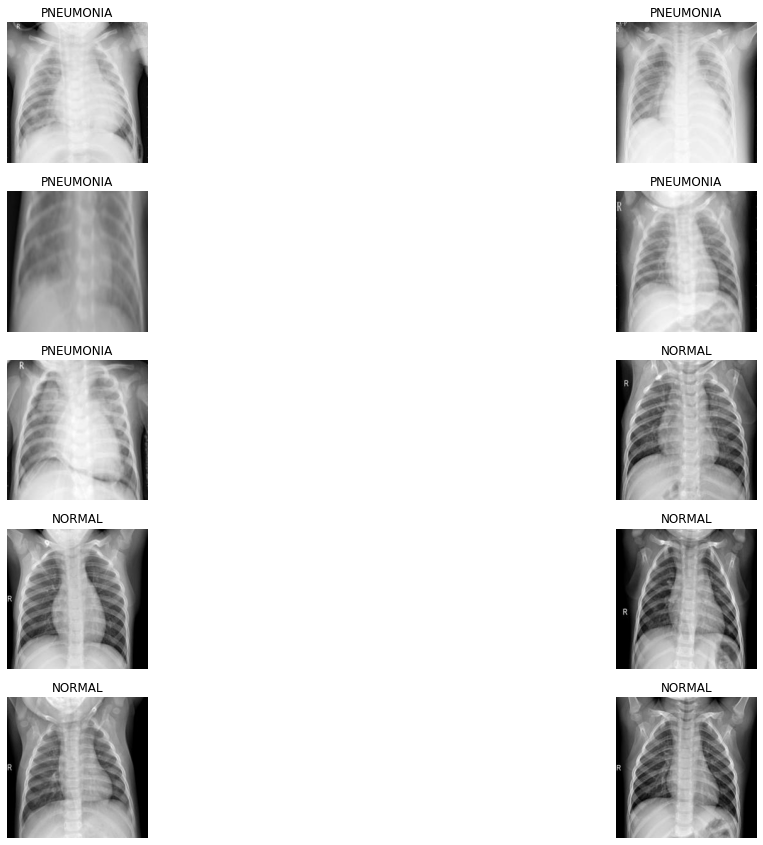

In [5]:
import random
nb_samples = 5 
train_gauss = "C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray/train_gauss"
classes = ['PNEUMONIA', 'NORMAL']

plt.figure(figsize=(20, 15))

for i, classe in enumerate(classes):
    images_classe = os.listdir(os.path.join(train_gauss, classe))
    rd_samples = random.sample(images_classe, nb_samples)
    
    for j, f in enumerate(rd_samples):
        image_path = os.path.join(train_gauss, classe, f)
        image = plt.imread(image_path)
        
        plt.subplot(nb_samples, len(classes), i * nb_samples + j + 1)
        plt.imshow(image, cmap='gray') 
        plt.title(classe)
        plt.axis('off')

plt.show()

### 6. Investigate the distribution of classes (Pneumonia/Normal). 

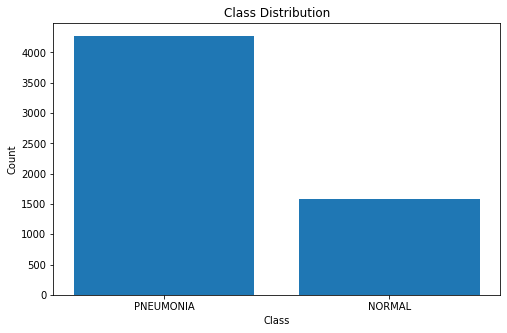

In [6]:
class_names = ['PNEUMONIA', 'NORMAL']
class_counts = {class_name: 0 for class_name in class_names}

#i iterate using the for loop through the dataset and count the number of images for each class
for class_name in class_names:
    for data_split in ['train_gauss', 'test_gauss', 'val_gauss']:
        class_path = os.path.join(data_location, data_split, class_name) #=> ../MFD/chest_xray/test/pneumonia for example
        num_images = len(os.listdir(class_path)) #i'am counting the number of images in each split
        class_counts[class_name] += num_images #i will update the count of images for a each class using +=

#i'am create a histogram
plt.figure(figsize=(8, 5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## Class Imbalance

### Objective

Understand how class imbalance affects model performance and learn ways to mitigate it.

### Guidance

1. Train a baseline model without accounting for class imbalance.
2. Evaluate its performance using metrics like accuracy, precision, recall, and F1-score.
3. Experiment with techniques like class weighting or oversampling methods like SMOTE to balance the classes.

### Exercise

Address the class imbalance and evaluate the impact on the model. Write your code in the cell below.


### 7.1. Train a baseline model without accounting for class imbalance.

In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

data_location = 'C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray'
train_gauss = os.path.join(data_location, 'train_gauss')
test_gauss = os.path.join(data_location, 'test_gauss')
val_gauss = os.path.join(data_location, 'val_gauss')

batch_size = 32
image_size = (128, 128)

# Load and preprocess the data without data augmentation
train_generator = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    train_gauss, target_size=image_size, batch_size=batch_size, class_mode='binary')

test_generator = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    test_gauss, target_size=image_size, batch_size=batch_size, class_mode='binary')

val_generator = tf.keras.preprocessing.image.ImageDataGenerator().flow_from_directory(
    val_gauss, target_size=image_size, batch_size=batch_size, class_mode='binary')

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=5, validation_data=val_generator, verbose=1)

# Make predictions on test data
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_accuracy}')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Train for 163 steps, validate for 1 steps
Epoch 1/5
163/163 [==============================] - 109s 670ms/step - loss: 5.1418 - accuracy: 0.8428 - val_loss: 0.3450 - val_accuracy: 0.7500
Epoch 2/5
163/163 [==============================] - 107s 659ms/step - loss: 0.2138 - accuracy: 0.9235 - val_loss: 0.7563 - val_accuracy: 0.6875
Epoch 3/5
163/163 [==============================] - 106s 649ms/step - loss: 0.1362 - accuracy: 0.9488 - val_loss: 1.1319 - val_accuracy: 0.6875
Epoch 4/5
163/163 [==============================] - 106s 648ms/step - loss: 0.1069 - accuracy: 0.9594 - val_loss: 0.3720 - val_accuracy: 0.8125
Epoch 5/5
163/163 [==============================] - 105s 646ms/step - loss: 0.0933 - accuracy: 0.9645 - val_loss: 0.6410 - val_accuracy: 0.8125
20/20 - 4s - loss: 1.0866 - accuracy: 0.7404
Test accuracy: 0.7403846383094788


### 7.2. Evaluate the performance

              precision    recall  f1-score   support

      normal       0.50      0.16      0.25       234
   pneumonia       0.64      0.90      0.75       390

    accuracy                           0.62       624
   macro avg       0.57      0.53      0.50       624
weighted avg       0.59      0.62      0.56       624



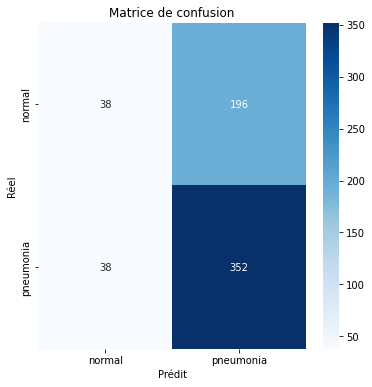

In [15]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_generator.reset()  
y_pred = model.predict(test_generator)
y_pred_binary = np.round(y_pred)

y_true = test_generator.classes

target_names = list(test_generator.class_indices.keys())
class_report = classification_report(y_true, y_pred_binary, target_names=target_names)

conf_matrix = confusion_matrix(y_true, y_pred_binary)

print(class_report)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('predicted')
plt.ylabel('real')
plt.title('confusion matrix')
plt.show()

### 7.3. Experiment Oversampling method to balance the Pneumonia and Normal classes.


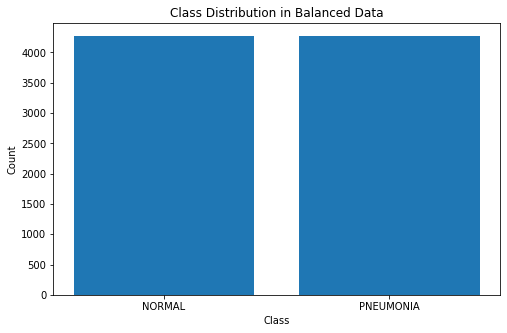

In [31]:
from imblearn.over_sampling import RandomOverSampler
import os
import numpy as np
import matplotlib.pyplot as plt

data_location = 'C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray'
class_names = ['PNEUMONIA', 'NORMAL']
image_size = (128, 128)

X = []
y = []

for class_name in class_names:
    for data_split in ['train_gauss', 'test_gauss', 'val_gauss']:
        class_path = os.path.join(data_location, data_split, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            X.append(image_path)  # Corrected to append image_path, not image
            y.append(class_name)
X = np.array(X)

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.reshape(-1, 1), y)  # Reshape X

unique_classes, counts = np.unique(y_resampled, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(unique_classes, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Balanced Data')
plt.show()

## Model Building

### Objective

Build and train a deep learning model for image classification.

### Guidance

1. Use a Convolutional Neural Network (CNN) for this task.
2. Experiment with different architectures and hyperparameters.

### Exercise

Build and train your model. Write your code in the cell below.


### 8. Train a CNN model with augmenting the data and evaluate its performance


In [9]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

data_location = 'C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray'
train_gauss = os.path.join(data_location, 'train_gauss')
test_gauss = os.path.join(data_location, 'test_gauss')
val_gauss = os.path.join(data_location, 'val_gauss')

#i define in the image generator parameters witch are the :  
#batch_size that represents the number of training samples used in a single weight update of the model during training
#the image size

batch_size = 32
image_size = (128, 128) 

train_datagen = ImageDataGenerator(
    rescale=1./255,  
    #define values for random image rotation, horizontal and vertical shift, shear, zoom, & horizontal flip
    rotation_range=20,  
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2,  
    zoom_range=0.2, 
    horizontal_flip=True,  
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255) 

#I load training, test, and validation data
train_generator = train_datagen.flow_from_directory(train_gauss, target_size=image_size, batch_size=batch_size, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_gauss, target_size=image_size, batch_size=batch_size, class_mode='binary')
val_generator = test_datagen.flow_from_directory(val_gauss, target_size=image_size, batch_size=batch_size, class_mode='binary')

#Here i'm going to create my CNN model and compile it
model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)), MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'), MaxPooling2D((2, 2)), Conv2D(128, (3, 3), activation='relu'), MaxPooling2D((2, 2)), Flatten(),
    Dense(128, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=5, validation_data=val_generator, verbose=1)

# Make predictions on test data
y_pred = model.predict(test_generator)
y_pred_binary = np.round(y_pred)



Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Train for 163 steps, validate for 1 steps
Epoch 1/5
163/163 [==============================] - 125s 770ms/step - loss: 0.5160 - accuracy: 0.7571 - val_loss: 0.6413 - val_accuracy: 0.5625
Epoch 2/5
163/163 [==============================] - 129s 790ms/step - loss: 0.4216 - accuracy: 0.7993 - val_loss: 0.5291 - val_accuracy: 0.8125
Epoch 3/5
163/163 [==============================] - 129s 793ms/step - loss: 0.3480 - accuracy: 0.8420 - val_loss: 0.5619 - val_accuracy: 0.8125
Epoch 4/5
163/163 [==============================] - 134s 819ms/step - loss: 0.2870 - accuracy: 0.8729 - val_loss: 0.4438 - val_accuracy: 0.7500
Epoch 5/5
163/163 [==============================] - 125s 767ms/step - loss: 0.2805 - accuracy: 0.8769 - val_loss: 0.7171 - val_accuracy: 0.7500


### 9. Evaluate the CNN model on imbalaced data with confusion matrix & classification report

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(test_generator.classes, y_pred_binary)
print("Confusion Matrix:")
print(confusion)

report = classification_report(test_generator.classes, y_pred_binary, target_names=['NORMAL', 'PNEUMONIA'])
print("Classification Report:")
print(report)

test_loss, test_accuracy = model.evaluate(test_generator)

Confusion Matrix:
[[ 42 192]
 [ 77 313]]
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.35      0.18      0.24       234
   PNEUMONIA       0.62      0.80      0.70       390

    accuracy                           0.57       624
   macro avg       0.49      0.49      0.47       624
weighted avg       0.52      0.57      0.53       624

20/20 [==============================] - 3s 162ms/step - loss: 0.5312 - accuracy: 0.7804


In [34]:
model.save('pneumonia_detection.h5')

## Data Augmentation

### Objective

Improve your model's performance by using data augmentation techniques.

### Guidance

1. Apply data augmentation techniques like rotation, flipping, and zooming to generate more training data.
2. Retrain your model using the augmented dataset.

### Exercise

Apply data augmentation techniques and evaluate the impact on the model. Write your code in the cell below.


### 10. Apply data noise techniques : salt and pepper, speckle, poisson and uniform noise

In [48]:
def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    np_image = np.array(image)
    noisy_image = np_image.copy()
    salt = np.random.rand(*np_image.shape) < salt_prob
    pepper = np.random.rand(*np_image.shape) < pepper_prob
    noisy_image[salt] = 255
    noisy_image[pepper] = 0
    return Image.fromarray(noisy_image)

def add_speckle_noise(image, intensity):
    np_image = np.array(image)
    noise = np.random.randn(*np_image.shape) * intensity
    noisy_image = np_image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

def add_poisson_noise(image, scale):
    np_image = np.array(image)
    noisy_image = np.random.poisson(np_image / 255.0 * scale) * 255.0 / scale
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

def add_uniform_noise(image, intensity):
    np_image = np.array(image)
    noise = np.random.uniform(low=-intensity, high=intensity, size=np_image.shape)
    noisy_image = np_image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_image)

# Define the path to your base directory
base_directory = 'C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray'

# Define the subdirectories
subdirectories = ['train', 'test', 'val']

# Define the classes
class_names = ['pneumonia', 'normal']

# Define noise parameters
salt_prob = 0.01
pepper_prob = 0.01
speckle_intensity = 0.1
poisson_scale = 0.1
uniform_intensity = 0.1

for subdirectory in subdirectories:
    for class_name in class_names:
        source_directory = os.path.join(base_directory, subdirectory, class_name)
        destination_directory = os.path.join(base_directory, subdirectory + '_noisy', class_name)
        os.makedirs(destination_directory, exist_ok=True)

        for image_name in os.listdir(source_directory):
            image_path = os.path.join(source_directory, image_name)
            image = Image.open(image_path)

            noisy_image = add_salt_and_pepper_noise(image, salt_prob, pepper_prob)
            noisy_image.save(os.path.join(destination_directory, 'salt_pepper_' + image_name))

            noisy_image = add_speckle_noise(image, speckle_intensity)
            noisy_image.save(os.path.join(destination_directory, 'speckle_' + image_name))

            noisy_image = add_poisson_noise(image, poisson_scale)
            noisy_image.save(os.path.join(destination_directory, 'poisson_' + image_name))

            noisy_image = add_uniform_noise(image, uniform_intensity)
            noisy_image.save(os.path.join(destination_directory, 'uniform_' + image_name))

### 11. Retrain your model using the augmented dataset

#### After augmenting the dataset, we went from 5216 to 20864 images 

In [ ]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

data_location = 'C:/Users/ASUS/Desktop/M2_SID/MFD/chest_xray'
train_noisy = os.path.join(data_location, 'train_noisy')
test_noisy = os.path.join(data_location, 'test_noisy')
val_noisy = os.path.join(data_location, 'val_noisy')

batch_size = 32
image_size = (128, 128) 

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Scale pixel values to [0, 1]
    #define values for random image rotation, horizontal and vertical shift, shear, zoom, & horizontal flip
    rotation_range=20,  
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2,  
    zoom_range=0.2, 
    horizontal_flip=True,  
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Mise à l'échelle pour les données de test/validation

#I load training, test, and validation data
train_generator = train_datagen.flow_from_directory(train_noisy, target_size=image_size, batch_size=batch_size, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_noisy, target_size=image_size, batch_size=batch_size, class_mode='binary')
val_generator = test_datagen.flow_from_directory(val_noisy, target_size=image_size, batch_size=batch_size, class_mode='binary')

#Here i'm going to create my CNN model and compile it
model = Sequential([Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)), MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'), MaxPooling2D((2, 2)), Conv2D(128, (3, 3), activation='relu'), MaxPooling2D((2, 2)), Flatten(),
    Dense(128, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=5, validation_data=val_generator, verbose=1)

# Make predictions on test data
y_pred = model.predict(test_generator)
y_pred_binary = np.round(y_pred)

Found 20864 images belonging to 2 classes.
Found 2496 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
Train for 652 steps, validate for 2 steps
Epoch 1/5
652/652 [==============================] - 1557s 2s/step - loss: 0.5477 - accuracy: 0.7419 - val_loss: 0.7764 - val_accuracy: 0.5000
Epoch 2/5


#### <span style="color:red"> This model retraining step is very consuming in terms of memory and time given that we quadrupled the data, so we went directly to the model deployment and tested it with an image </span> 

## Model Evaluation

### Objective

Evaluate your model's performance using different metrics and visualization tools.

### Guidance

1. Use metrics like accuracy, precision, recall, and F1-score for evaluation.
2. Plot confusion matrices and ROC curves to visualize your model's performance.

### Exercise

Evaluate your model and interpret the results. Write your code in the cell below.


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have true labels for your test data
true_labels = test_generator.classes
predicted_labels = y_pred_binary  # Assuming y_pred_binary contains predicted labels

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Generate and print the classification report
classification_rep = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices)
print("Classification Report:")
print(classification_rep)

## Model Deployment (Bonus)

### Objective

Learn the basics of deploying a machine learning model.

### Guidance

1. Save your trained model.
2. Use Flask to create a simple REST API to serve your model.

### Exercise

Deploy your model using Flask. Write your code in the cell below.


In [23]:
from flask import Flask, request, jsonify

In [1]:
import os
import numpy as np
from flask import Flask, request, jsonify
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img

app = Flask(__name__) #create a flask instance

# Load the trained model
model = load_model('pneumonia_detection.h5')

# Define a route for making predictions
@app.route('/predict', methods=['POST']) #define the respose port via POST method
def predict():
    try:
        # Get the uploaded image
        image = request.files['image']
        image = load_img(image, target_size=(128, 128))
        image = img_to_array(image)
        image = np.expand_dims(image, axis=0)

        # Make a prediction
        prediction = model.predict(image)
        prediction = np.round(prediction).astype(int)

        # Return the prediction as JSON
        return jsonify({'prediction': prediction[0][0]})

    except Exception as e:
        return jsonify({'error': str(e)})
    
if __name__ == "__main__":
    port = int(os.environ.get("PORT", 5000))
    app.run(host='0.0.0.0', port=port)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://10.188.12.89:5000/ (Press CTRL+C to quit)



### Next Steps

1. Experiment with more advanced architectures and hyperparameters.
2. Deploy your model
3. Integrate your model into a web application or other services.
4. Learn more about MLOps best practices and tools.




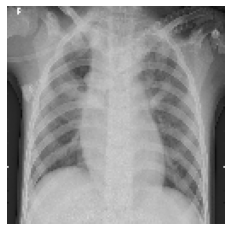

This is a PNEUMONIA xray image


In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt  # Import pyplot from matplotlib

model = tf.keras.models.load_model('pneumonia_detection.h5')

# Load and preprocess the test image
image = tf.keras.preprocessing.image.load_img('C:/Users/ASUS/Desktop/testimg.jpeg', target_size=(128, 128))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = image / 255.0

prediction = model.predict(image)

# Create a figure and axes to display the image
fig, ax = plt.subplots()

# Display the image
ax.imshow(image[0])  # Assuming the first image in the batch
ax.axis('off')

# Show the plot
plt.show()

# Display the prediction result
if prediction[0][0] > 0.5:
    print("This is a PNEUMONIA xray image")
else:
    print("This is a NORMAL xray image")

In [16]:
!pip freeze

argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
async-generator==1.10
attrs==22.2.0
backcall==0.2.0
bleach==4.1.0
cffi==1.15.1
click==8.0.4
colorama==0.4.5
cycler==0.11.0
dataclasses==0.8
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
Flask==2.0.3
importlib-metadata==4.8.3
ipykernel==5.5.6
ipython==7.16.3
ipython-genutils==0.2.0
itsdangerous==2.0.1
jedi==0.17.2
Jinja2==3.0.3
jsonschema==3.2.0
jupyter-client==7.1.2
jupyter-core==4.9.2
jupyterlab-pygments==0.1.2
jupyterthemes==0.20.0
kiwisolver==1.3.1
lesscpy==0.15.1
MarkupSafe==2.0.1
matplotlib==3.3.4
mistune==0.8.4
nbclient==0.5.9
nbconvert==6.0.7
nbformat==5.1.3
nest-asyncio==1.5.8
notebook==6.4.10
numpy==1.19.5
packaging==21.3
pandas==1.1.5
pandocfilters==1.5.0
parso==0.7.1
pickleshare==0.7.5
Pillow==8.4.0
ply==3.11
prometheus-client==0.17.1
prompt-toolkit==3.0.36
pycparser==2.21
Pygments==2.14.0
pyparsing==3.0.7
pyrsistent==0.18.0
python-dateutil==2.8.2
pytz==2023.3.post1
pywin32==305
pywinpty==1.1.6
pyzmq==25.1.1
Send2Trash==